In [32]:
import numpy as np
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [98]:
quandl.ApiConfig.api_key = 'tAyfv1zpWnyhmDsp91yv'
goog_table = quandl.get('WIKI/GOOG')
amzn_table = quandl.get('WIKI/AMZN')
ebay_table = quandl.get('WIKI/EBAY')
wal_table = quandl.get('WIKI/WMT')
aapl_table = quandl.get('WIKI/AAPL')

In [120]:
goog = goog_table.loc['2016',['Close']]
amzn = amzn_table.loc['2016',['Close']]
ebay = ebay_table.loc['2016',['Close']]
wal = wal_table.loc['2016',['Close']]
aapl = aapl_table.loc['2016',['Close']]
goog_log = np.log(goog.Close).diff().dropna()
amzn_log = np.log(amzn.Close).diff().dropna()
ebay_log = np.log(ebay.Close).diff().dropna()
wal_log = np.log(wal.Close).diff().dropna()
aapl_log = np.log(aapl.Close).diff().dropna()
df = pd.concat([goog_log,amzn_log,ebay_log,wal_log,aapl_log],axis = 1).dropna()
df.columns = ['goog','amzn','ebay','wal','aapl']
df.tail()

,goog,amzn,ebay,wal,aapl
Date,,,,,
2016-12-23,-0.001708,-0.007531,0.008427,-0.000719,0.001976
2016-12-27,0.002074,0.014113,0.014993,0.002298,0.006331
2016-12-28,-0.008246,0.000946,-0.007635,-0.005611,-0.004273
2016-12-29,-0.002883,-0.009081,-0.001000,-0.000722,-0.000257
2016-12-30,-0.014113,-0.020172,-0.009720,-0.002023,-0.007826


In [121]:
model = sm.ols(formula = 'amzn~goog+ebay+wal+aapl',data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     12.51
Date:                Wed, 23 May 2018   Prob (F-statistic):           9.49e-10
Time:                        14:16:24   Log-Likelihood:                 419.66
No. Observations:                 124   AIC:                            -827.3
Df Residuals:                     118   BIC:                            -810.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.001      0.453      0.6

In [122]:
simple = sm.ols(formula = 'amzn ~ goog',data = df).fit()
print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:                   amzn   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     134.7
Date:                Wed, 23 May 2018   Prob (F-statistic):           3.50e-25
Time:                        14:16:25   Log-Likelihood:                 702.38
No. Observations:                 251   AIC:                            -1401.
Df Residuals:                     249   BIC:                            -1394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.550      0.5

In [123]:
from datetime import datetime
url = 'https://www.quantconnect.com/tutorials/wp-content/uploads/2017/08/F-F_Research_Data_5_Factors_2x3_daily.csv'
fama_table = pd.read_csv(url)
index = [datetime.strptime(str(x), "%Y%m%d") for x in fama_table.iloc[:,0]]
fama_table.index = index
fama_table = fama_table.iloc[:,1:]

In [124]:
fama = fama_table['2016']
fama = fama.rename(columns = {'Mkt-RF':'MKT'})
fama = fama.apply(lambda x: x/100)
fama_df = pd.concat([fama,amzn_log],axis = 1)

In [125]:
fama_model = sm.ols(formula = 'Close~MKT+SMB+HML+RMW+CMA',data = fama_df).fit()
print(fama_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     30.97
Date:                Wed, 23 May 2018   Prob (F-statistic):           2.21e-24
Time:                        14:16:27   Log-Likelihood:                 709.59
No. Observations:                 251   AIC:                            -1407.
Df Residuals:                     245   BIC:                            -1386.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.001      1.028      0.3

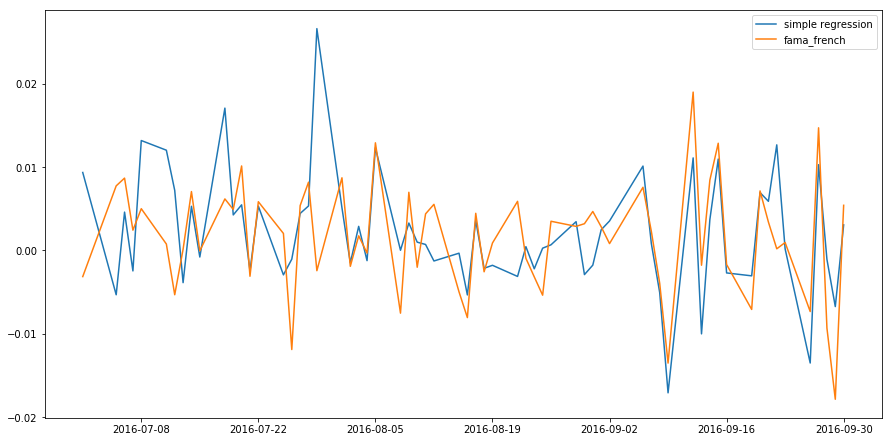

In [134]:
result = pd.DataFrame({'simple regression':simple.predict(),'fama_french':fama_model.predict(),'sample':df.amzn},index = df.index)
plt.figure(figsize = (15,7.5))
plt.plot(result['2016-7':'2016-9'].index,result.loc['2016-7':'2016-9','simple regression'])
plt.plot(result['2016-7':'2016-9'].index,result.loc['2016-7':'2016-9','fama_french'])
plt.legend()
plt.show()

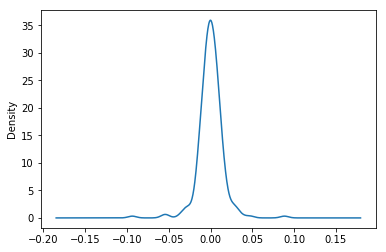

In [135]:
plt.figure()
simple.resid.plot.density()
plt.show()

In [136]:
print 'residual mean: ', np.mean(fama_model.resid)
print 'residual variance: ', np.var(fama_model.resid)

SyntaxError: invalid syntax (<ipython-input-136-15922c3fe4e7>, line 1)

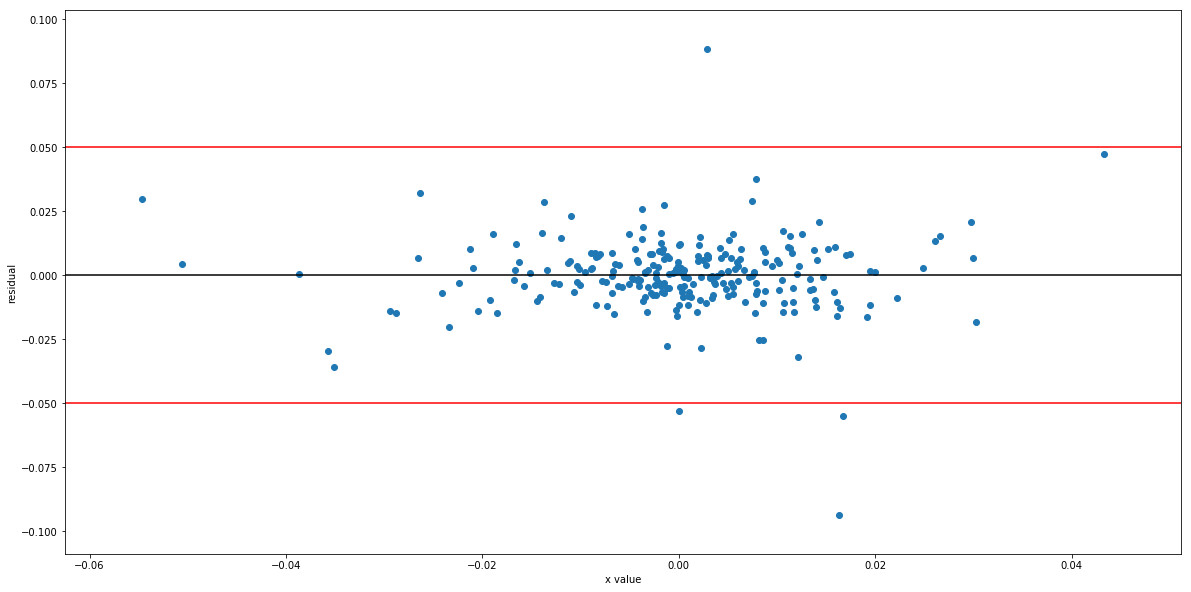

In [138]:
plt.figure(figsize = (20,10))
plt.scatter(df.goog,simple.resid)
plt.axhline(0.05,color = 'r')
plt.axhline(-0.05,color = 'r')
plt.axhline(0,color = 'black')
plt.xlabel('x value')
plt.ylabel('residual')
plt.show()

In [140]:
from pandas.core import datetools
from statsmodels.stats import diagnostic as dia

In [142]:
het = dia.het_breuschpagan(fama_model.resid,fama_df[['MKT','SMB','HML','RMW','CMA']][1:])
print('p-value of Heteroskedasticity: ', het[-1])

p-value of Heteroskedasticity:  0.14407584284381386


In [144]:
dia.het_breuschpagan(simple.resid,pd.DataFrame(df.goog))

(1.7248088754041377, nan, 1.7298240426802394, 0.18963839548692538)

In [22]:
print((float(factorial(10))/(factorial(7)*factorial(10-7)))*(0.7**7)*(0.3**3))

0.2668279319999998
